In [12]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time
import numpy as np

In [4]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)

Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


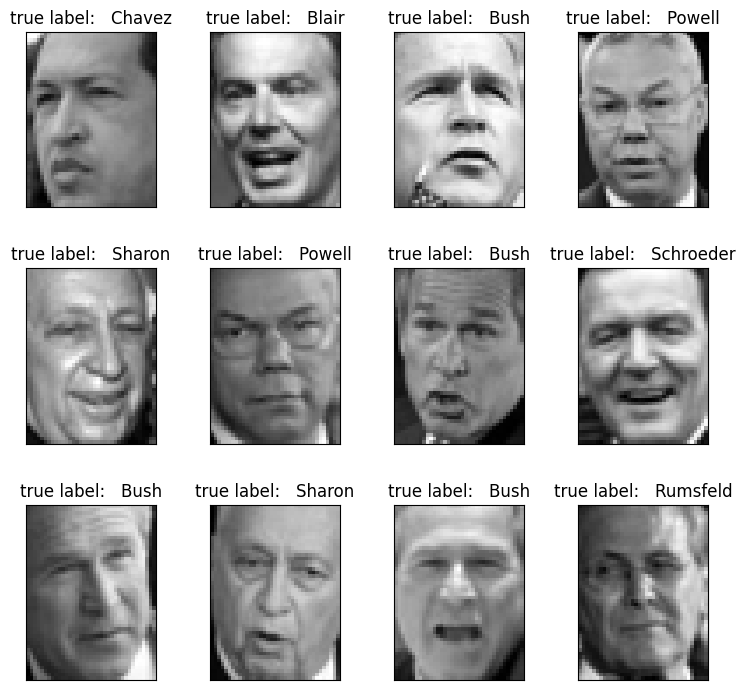

In [5]:
# Function to plot images in 3 * 4  
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))

size of training Data is  966 and Testing Data is  322


In [13]:
n_components = 150

t0 = time()
pca = PCA(n_components = n_components, svd_solver ='randomized',
          whiten = True).fit(X_train)
print("done in % 0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in % 0.3fs" % (time() - t0))

done in  0.038s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.002s


/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kiet-na/Docu

In [14]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
print("-----------------------------------------------------")
print("Dimensions of training set = % s and Test Set = % s"%(
        X_train.shape, X_test.shape))

Sample Data point after applying PCA
 [ 1.3497074   1.0167017   1.7700955   0.5382378   0.89965814  0.4252353
 -0.9115309  -0.99022067  0.49278343 -0.04860769 -0.0428214  -0.57587636
  0.2459057  -0.00509205 -2.7739675  -0.37470552 -1.6068846   2.7752333
 -3.9734118  -1.2851313  -0.12129364  0.02376266 -0.96041054 -0.32186532
 -0.35327452 -1.2979741   0.33486533 -0.09995759 -2.6302052   1.194668
 -0.87362087 -0.10567827  0.7648216   2.11509     1.33596     1.0994965
 -0.35847902  2.2308154   0.51774544 -1.77243     0.6695024  -0.4969036
  1.1889579   0.22061944 -1.9567753   1.1698698   0.7847063   0.8962764
  2.1730852   1.9331709   4.4541183   0.08218451  1.5592399   2.1471686
  1.0998344  -0.17050666 -1.5843183   1.2514534  -0.13488743 -0.92135096
  1.5656072  -0.86583054 -0.324762   -0.08476258 -4.062884    2.546044
  2.0583463  -1.4018593  -0.1486191   0.9270301  -0.0718991   1.3164234
 -1.6414053  -1.2625699   3.3931224  -1.2082533  -1.3763247   2.2221365
 -0.35533595  0.09094459 

In [15]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in % 0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in % 0.3fs" % (time() - t0))
# print classification results
print(classification_report(y_test, y_pred, target_names = target_names))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))

Fitting the classifier to the training set
done in  5.723s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in  0.016s
                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.54      0.67        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.81      0.63      0.71        27
    George W Bush       0.83      0.97      0.89       146
Gerhard Schroeder       1.00      0.80      0.89        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.85       322
        macro avg       0.90      0.73      0.79       322
     weighted avg       0.86      0.85      0.84       322

Confusion Matrix is:
[[  7   1   0   5   0   0   0]
 [  1  52   3   4   0   0   0]
 [  0   1  17   9   0   0   0]
 [  0   4   0 142   0   0   

=== PCA + 1-NN ===
                   precision    recall  f1-score   support

     Ariel Sharon       0.42      0.38      0.40        13
     Colin Powell       0.83      0.67      0.74        60
  Donald Rumsfeld       0.35      0.48      0.41        27
    George W Bush       0.75      0.84      0.79       146
Gerhard Schroeder       0.58      0.44      0.50        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.55      0.47      0.51        36

         accuracy                           0.68       322
        macro avg       0.61      0.56      0.58       322
     weighted avg       0.69      0.68      0.68       322



/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kiet-na/Docu

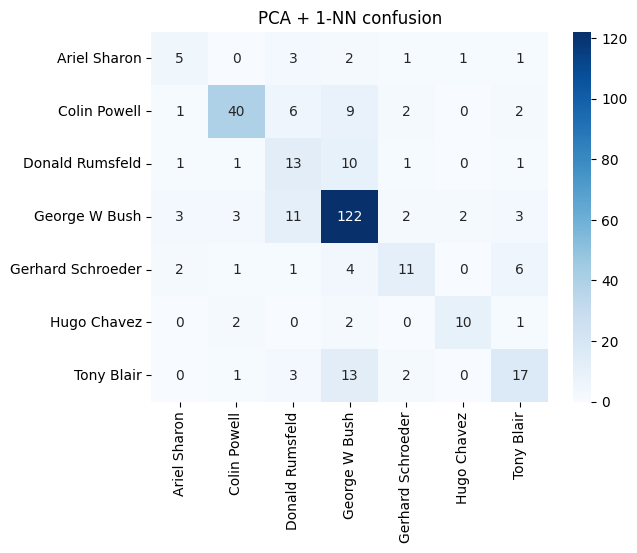

In [18]:
# Ⓐ --- Eigenfaces + 1-NN ---------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

K_PCA = 100           # keep ~95 % variance (tune if you wish)

pipe_eig_nn = make_pipeline(
    PCA(n_components=K_PCA, svd_solver='randomized', whiten=True, random_state=42),
    KNeighborsClassifier(n_neighbors=1, metric='euclidean')
)

pipe_eig_nn.fit(X_train, y_train)
y_pred_nn = pipe_eig_nn.predict(X_test)

print("=== PCA + 1-NN ===")
print(classification_report(y_test, y_pred_nn, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("PCA + 1-NN confusion"); plt.show()

=== Fisherfaces (PCA ➜ LDA) + 1-NN ===
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.62      0.64        13
     Colin Powell       0.74      0.82      0.78        60
  Donald Rumsfeld       0.62      0.67      0.64        27
    George W Bush       0.91      0.86      0.88       146
Gerhard Schroeder       0.62      0.64      0.63        25
      Hugo Chavez       0.64      0.60      0.62        15
       Tony Blair       0.76      0.81      0.78        36

         accuracy                           0.79       322
        macro avg       0.71      0.71      0.71       322
     weighted avg       0.79      0.79      0.79       322



/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: divide by zero encountered in matmul
  X = (
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: overflow encountered in matmul
  X = (
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: invalid value encountered in matmul
  X = (
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:629: RuntimeWarning: divide by zero encountered in matmul
  self.scalings_ = scalings @ Vt.T[:, :rank]
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:629: RuntimeWarning: overflow encountered in matmul
  self.scalings_ = scalings @ Vt.T[:, :rank]
/Use

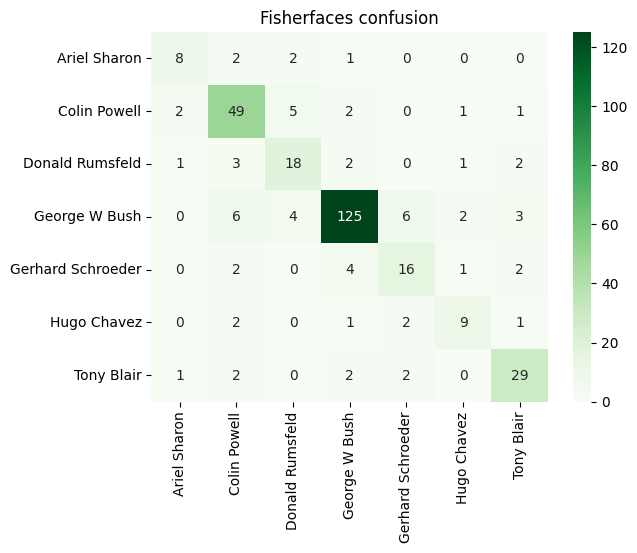

In [20]:
# Ⓑ --- Fisherfaces (PCA ➜ LDA) + 1-NN  -----------------------------
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pipe_fisher = make_pipeline(
    PCA(n_components=0.98,               # keep ≥98 % variance
        svd_solver='full',               # <-- change here
        whiten=True,
        random_state=42),
    LDA(),                               # supervised step
    KNeighborsClassifier(n_neighbors=1, metric='euclidean')
)

pipe_fisher.fit(X_train, y_train)
y_pred_lda = pipe_fisher.predict(X_test)

print("=== Fisherfaces (PCA ➜ LDA) + 1-NN ===")
print(classification_report(y_test, y_pred_lda, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_lda)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Fisherfaces confusion"); plt.show()

=== LDA alone (no PCA) + 1-NN ===
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.62      0.55        13
     Colin Powell       0.69      0.67      0.68        60
  Donald Rumsfeld       0.61      0.52      0.56        27
    George W Bush       0.85      0.79      0.82       146
Gerhard Schroeder       0.58      0.60      0.59        25
      Hugo Chavez       0.50      0.67      0.57        15
       Tony Blair       0.58      0.69      0.63        36

         accuracy                           0.71       322
        macro avg       0.62      0.65      0.63       322
     weighted avg       0.72      0.71      0.71       322



/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:591: RuntimeWarning: divide by zero encountered in matmul
  self.xbar_ = self.priors_ @ self.means_
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:591: RuntimeWarning: overflow encountered in matmul
  self.xbar_ = self.priors_ @ self.means_
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:591: RuntimeWarning: invalid value encountered in matmul
  self.xbar_ = self.priors_ @ self.means_
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: divide by zero encountered in matmul
  X = (
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/discriminant_analysis.py:613: RuntimeWarning: overflow encoun

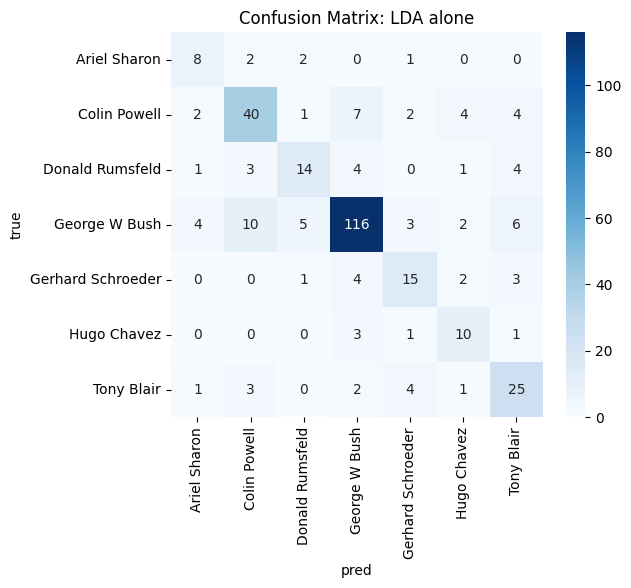

In [21]:
from sklearn.pipeline    import make_pipeline
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics     import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline: raw pixels -> LDA -> 1-NN
pipe_lda_only = make_pipeline(
    LDA(solver='svd'),                            # reduces to C-1 dims
    KNeighborsClassifier(n_neighbors=1, metric='euclidean')
)

# train & predict
pipe_lda_only.fit(X_train, y_train)
y_pred_lda_only = pipe_lda_only.predict(X_test)

# report
print("=== LDA alone (no PCA) + 1-NN ===")
print(classification_report(y_test, y_pred_lda_only, target_names=target_names))

# confusion
cm = confusion_matrix(y_test, y_pred_lda_only)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix: LDA alone"); plt.ylabel("true"); plt.xlabel("pred")
plt.show()

=== RBF-Kernel PCA + 1-NN ===
                   precision    recall  f1-score   support

     Ariel Sharon       0.18      0.23      0.20        13
     Colin Powell       0.57      0.58      0.58        60
  Donald Rumsfeld       0.34      0.48      0.40        27
    George W Bush       0.73      0.67      0.70       146
Gerhard Schroeder       0.28      0.20      0.23        25
      Hugo Chavez       0.47      0.47      0.47        15
       Tony Blair       0.33      0.36      0.35        36

         accuracy                           0.54       322
        macro avg       0.41      0.43      0.42       322
     weighted avg       0.55      0.54      0.55       322



/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/

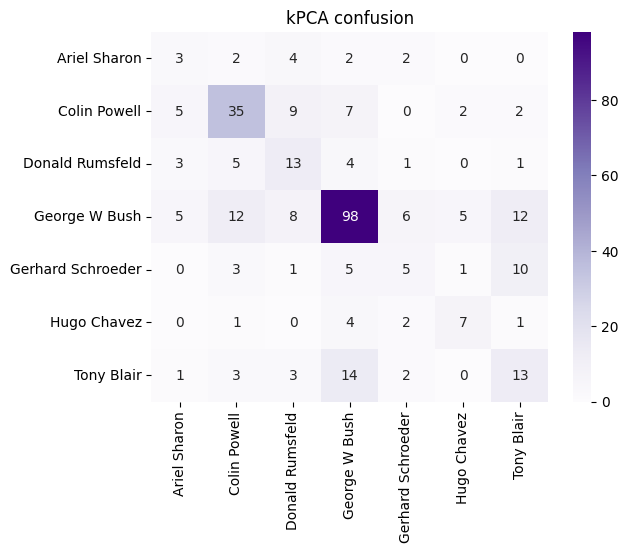

In [24]:
# Ⓒ --- RBF-Kernel PCA ------------------------------------------------------
from sklearn.decomposition import KernelPCA

# median-distance heuristic for gamma
sample = X_train[np.random.choice(len(X_train), 300, replace=False)]
pairwise_dists = np.linalg.norm(sample[:, None] - sample[None, :], axis=2)
gamma = 1.0 / (2.0 * np.median(pairwise_dists)**2)

kpca = KernelPCA(kernel='rbf', gamma=gamma, n_components=120,
                 fit_inverse_transform=False, random_state=42)
X_train_k = kpca.fit_transform(X_train)
X_test_k  = kpca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean').fit(X_train_k, y_train)
y_pred_kpca = knn.predict(X_test_k)

print("=== RBF-Kernel PCA + 1-NN ===")
print(classification_report(y_test, y_pred_kpca, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_kpca)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=target_names, yticklabels=target_names)
plt.title("kPCA confusion"); plt.show()

In [27]:
import os
# ensure figures directory exists
os.makedirs("figures", exist_ok=True)

/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kiet-na/Documents/Github/pca-face-recognition/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/kiet-na/Docu

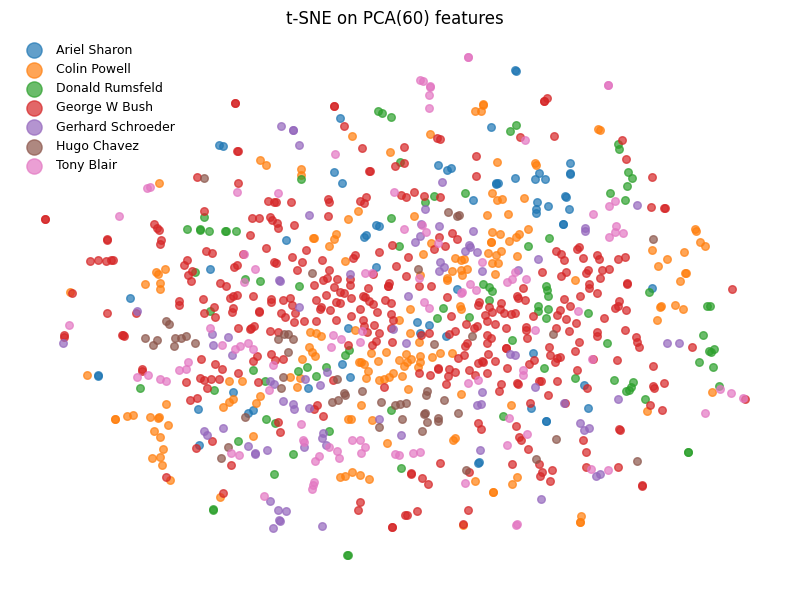

In [29]:
# Ⓓ 2-D t-SNE map over PCA(60) embeddings, with auto-creation of figures/
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1) make sure the output folder exists
os.makedirs("figures", exist_ok=True)

# 2) fit PCA on the TRAINING set and reduce to K=60
K = 60
pca60 = PCA(
    n_components=K,
    svd_solver='randomized',
    whiten=True,
    random_state=42
)
X_train_pca = pca60.fit_transform(X_train)

# 3) run t-SNE on those 60-D PCA features
tsne = TSNE(
    n_components=2,
    init='pca',
    random_state=42,
    perplexity=30,
    learning_rate='auto'
)
Z = tsne.fit_transform(X_train_pca)

# 4) scatter-plot and save
plt.figure(figsize=(8,6))
for label_idx, name in enumerate(target_names):
    pts = Z[y_train == label_idx]
    plt.scatter(
        pts[:,0], pts[:,1],
        s=30, alpha=0.7,
        label=name
    )
plt.legend(markerscale=2, fontsize=9, frameon=False)
plt.title("t-SNE on PCA(60) features")
plt.axis('off')
plt.tight_layout()
plt.savefig("figures/tsne_on_pca60.png", dpi=300)
plt.show()

▶ Running LDA → 1-NN... done in 2.1s → test acc = 70.2%
▶ Running PCA → LDA → 1-NN... done in 0.4s → test acc = 84.8%
▶ Running LDA → SVM (RBF)... done in 0.8s → test acc = 66.1%
▶ Running PCA → LDA → SVM... done in 0.9s → test acc = 82.3%
▶ Running PCA → SVM (RBF)... done in 1.3s → test acc = 86.0%
▶ Running PCA → 1-NN... done in 0.4s → test acc = 69.6%
▶ Running Kernel PCA → SVM... done in 6.4s → test acc = 88.2%
▶ Running Kernel PCA → LDA → SVM... done in 4.2s → test acc = 81.4%
▶ Running Kernel PCA → LDA → 1-NN... done in 1.6s → test acc = 82.6%


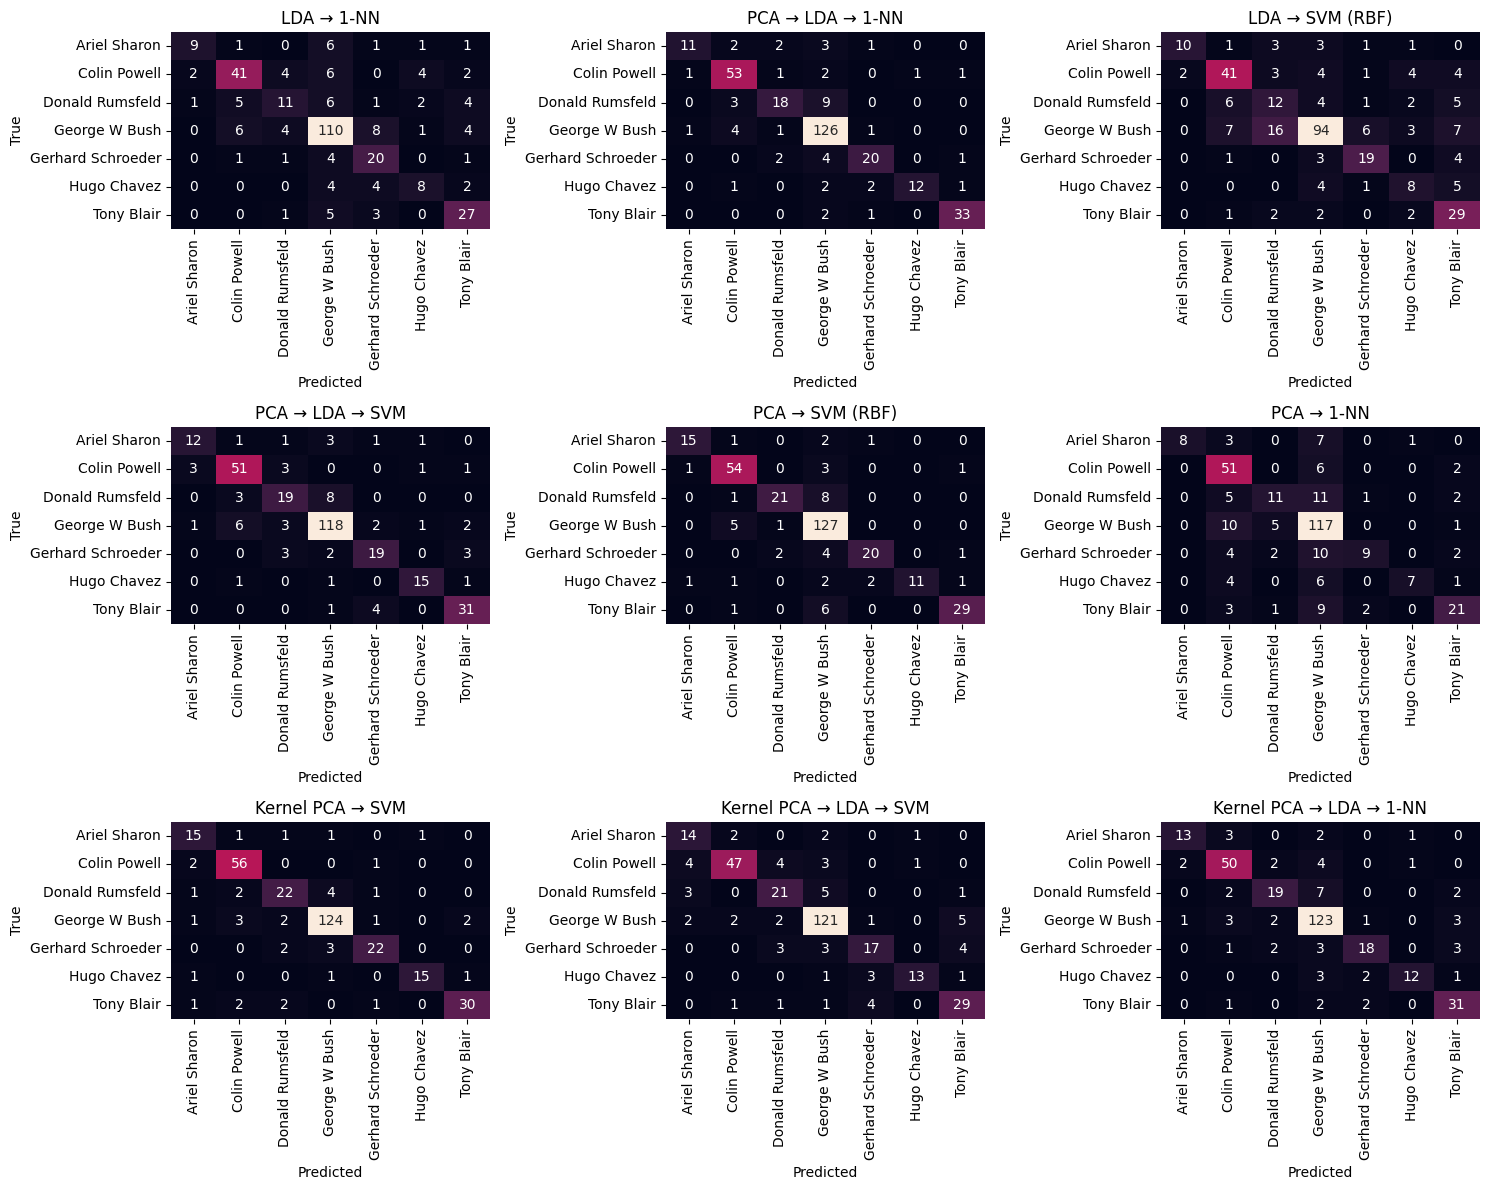

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import math
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score, confusion_matrix

# 1) Load LFW subset
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw.data, lfw.target
names = lfw.target_names
n_classes = len(names)

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3) Define your pipelines
pipe_lda_nn       = Pipeline([('lda', LDA(solver='svd')),
                              ('knn', KNeighborsClassifier())])
pipe_pca_lda_nn   = Pipeline([('pca', PCA(svd_solver='randomized', whiten=True, random_state=42)),
                              ('lda', LDA(solver='svd')),
                              ('knn', KNeighborsClassifier())])
pipe_lda_svm      = Pipeline([('lda', LDA(solver='svd')),
                              ('svm', SVC(kernel='rbf', class_weight='balanced'))])
pipe_pca_lda_svm  = Pipeline([('pca', PCA(svd_solver='randomized', whiten=True, random_state=42)),
                              ('lda', LDA(solver='svd')),
                              ('svm', SVC(kernel='rbf', class_weight='balanced'))])
pipe_pca_svm      = Pipeline([('pca', PCA(svd_solver='randomized', whiten=True, random_state=42)),
                              ('svm', SVC(kernel='rbf', class_weight='balanced'))])
pipe_kpca_svm     = Pipeline([('kpca', KernelPCA(kernel='rbf', random_state=42)),
                              ('svm',  SVC(kernel='rbf', class_weight='balanced'))])
pipe_kpca_lda_svm = Pipeline([('kpca', KernelPCA(kernel='rbf', random_state=42)),
                              ('lda',  LDA(solver='svd')),
                              ('svm',  SVC(kernel='rbf', class_weight='balanced'))])
pipe_kpca_lda_nn  = Pipeline([('kpca', KernelPCA(kernel='rbf', random_state=42)),
                              ('lda',  LDA(solver='svd')),
                              ('knn',  KNeighborsClassifier())])
pipe_pca_nn = Pipeline([('pca', PCA(svd_solver='randomized', whiten=True, random_state=42)),
                        ('knn', KNeighborsClassifier())])

# 4) Parameter grids
grid_knn = {'knn__n_neighbors': [1, 3, 5]}
grid_svm = {'svm__C': [1e3, 5e3, 1e4],
            'svm__gamma': [5e-4, 1e-3, 5e-3]}

gs_specs = [
    ("LDA → 1-NN",           pipe_lda_nn,       grid_knn),
    ("PCA → LDA → 1-NN",     pipe_pca_lda_nn,   {**grid_knn, 'pca__n_components':[30,50,80,120]}),
    ("LDA → SVM (RBF)",      pipe_lda_svm,      grid_svm),
    ("PCA → LDA → SVM",      pipe_pca_lda_svm,  {**grid_svm, 'pca__n_components':[50,80,120,150]}),
    ("PCA → SVM (RBF)",      pipe_pca_svm,      {**grid_svm, 'pca__n_components':[50,80,120,150]}),
    ("PCA → 1-NN",      pipe_pca_nn,      {**grid_knn, 'pca__n_components':[50,80,120,150]}),
    ("Kernel PCA → SVM",     pipe_kpca_svm,     {**grid_svm, 'kpca__n_components':[250,350], 'kpca__gamma':[1e-4,5e-4,1e-3]}),
    ("Kernel PCA → LDA → SVM", pipe_kpca_lda_svm,{**grid_svm, 'kpca__n_components':[250,350], 'kpca__gamma':[1e-4,5e-4,1e-3]}),
    ("Kernel PCA → LDA → 1-NN",pipe_kpca_lda_nn,{**grid_knn, 'kpca__n_components':[250,350], 'kpca__gamma':[1e-4,5e-4,1e-3]}),
]

# 5) Run grid searches & collect results
results = []
for name, pipe, grid in gs_specs:
    print(f"▶ Running {name}...", end=" ")
    t0 = time()
    gs = GridSearchCV(pipe, grid, cv=5, n_jobs=-1)
    gs.fit(X_train, y_train)
    elapsed = time() - t0
    y_pred = gs.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"done in {elapsed:.1f}s → test acc = {acc:.1f}%")
    results.append((name, acc, gs.best_params_, y_pred))

# 6) Save summary table to CSV
df = pd.DataFrame([{
    'Pipeline': name,
    'Accuracy (%)': acc,
    'BestParams': params
} for name, acc, params, _ in results])
df.to_csv("figures/pipeline_results.csv", index=False)

# 7) Plot and save the confusion‐matrix grid
n_methods = len(results)
n_cols    = 3
n_rows    = math.ceil(n_methods / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), squeeze=False)

for idx, (name, _, _, y_pred) in enumerate(results):
    r, c = divmod(idx, n_cols)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))
    ax = axes[r][c]
    sns.heatmap(cm, annot=True, fmt='d', ax=ax,
                xticklabels=names, yticklabels=names, cbar=False)
    ax.set_title(name, fontsize=12)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# remove any unused subplots
for idx in range(n_methods, n_rows*n_cols):
    r, c = divmod(idx, n_cols)
    fig.delaxes(axes[r][c])

plt.tight_layout()
plt.savefig("figures/comparison.png", dpi=300)
plt.show()

# 8) (Optional) Example: Save a t-SNE figure placeholder
# Assuming you have `tsne_embeddings` as an array of shape (n_samples, 2) and `y_test` labels:
# plt.figure(figsize=(6,6))
# scatter = plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], c=y_test, cmap='tab10', s=10)
# plt.legend(handles=scatter.legend_elements()[0], labels=names, loc='best', fontsize=8)
# plt.title("t-SNE Visualization of Test Embeddings")
# plt.savefig("figures/tsne_plot.png", dpi=300)
# plt.show()


In [85]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assume you’ve already fit these pipelines on X_train/y_train:
# pipe_pca         : PCA → 1-NN (we just need the PCA step)
# pipe_pca_lda_nn  : PCA → LDA → 1-NN (we just need the PCA+LDA steps)
# pipe_kpca        : KernelPCA → ... (you’ll need to refit or isolate the KPCA step)

# For clarity, re-create just the feature‐extraction parts:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1) Fit the feature extractors on the training data
pca = PCA(n_components=100, svd_solver='randomized', whiten=True, random_state=42)
pca.fit(X_train)

pca_lda = PCA(n_components=100, svd_solver='randomized', whiten=True, random_state=42)
pca_lda.fit(X_train)
lda = LDA(solver='svd')
lda.fit(pca_lda.transform(X_train), y_train)

kpca = KernelPCA(n_components=100, kernel='rbf', gamma=5e-4, random_state=42, fit_inverse_transform=False)
kpca.fit(X_train)

# 2) Transform the test set
Z_pca       = pca.transform(X_test)
Z_fisher    = lda.transform(pca_lda.transform(X_test))
Z_kpca      = kpca.transform(X_test)

# 3) Run t-SNE on each
tsne = TSNE(n_components=2, init='pca', random_state=42, learning_rate='auto')
Y_pca    = tsne.fit_transform(Z_pca)
Y_fisher = tsne.fit_transform(Z_fisher)
Y_kpca   = tsne.fit_transform(Z_kpca)

# 4) Plot & save
def plot_tsne(Y, title, fname):
    plt.figure(figsize=(5,5))
    for label in np.unique(y_test):
        idx = y_test == label
        plt.scatter(Y[idx,0], Y[idx,1], label=names[label], s=10)
    plt.legend(markerscale=2, fontsize=6, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.xticks([]); plt.yticks([])
    plt.tight_layout()
    plt.savefig(f"figures/{fname}", dpi=300)
    plt.close()

plot_tsne(Y_pca,    "t-SNE of PCA embeddings",       "tsne_pca.png")
plot_tsne(Y_fisher, "t-SNE of Fisherface embeddings","tsne_fisher.png")
plot_tsne(Y_kpca,   "t-SNE of Kernel PCA embeddings","tsne_kernelpca.png")


In [86]:
import os
from sklearn.manifold import TSNE

# make sure output dir exists
os.makedirs("figures", exist_ok=True)

# --- A) Compute & save mean face + top‐16 eigenfaces ---
# reshape parameters
h, w = lfw.images.shape[1], lfw.images.shape[2]

# fit a plain PCA on training data (no whitening) for visualization
viz_pca = PCA(svd_solver='randomized', random_state=42)
viz_pca.fit(X_train)

# mean face
mean_face = viz_pca.mean_.reshape(h, w)
plt.imsave("figures/mean_face.png", mean_face, cmap='gray')

# top-16 eigenfaces montage
eigs = viz_pca.components_[:16].reshape((16, h, w))
fig, axes = plt.subplots(4,4, figsize=(4,4), dpi=100)
for i, ax in enumerate(axes.flat):
    ax.imshow(eigs[i], cmap='gray')
    ax.axis('off')
plt.tight_layout(pad=0)
fig.savefig("figures/eigenfaces_top16.png")
plt.close(fig)

# --- B) Scree plot ---
var_ratio = viz_pca.explained_variance_ratio_
cumvar = var_ratio.cumsum()
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
ax.plot(np.arange(1, len(var_ratio)+1), cumvar, marker='o')
ax.set_xlabel("Number of components")
ax.set_ylabel("Cumulative explained variance")
ax.set_title("PCA Scree / Cumulative Variance Plot")
ax.grid(True)
plt.tight_layout()
fig.savefig("figures/scree_plot.png")
plt.close(fig)

# --- C) Reconstruction examples ---
# choose a handful of test images
indices = [0, 1, 2]  # first three test images, adjust as you like
ks = [10, 50, 150]
fig, axes = plt.subplots(len(indices), len(ks)+1, figsize=(len(ks)+1, len(indices)), dpi=100)
for row, idx in enumerate(indices):
    original = X_test[idx].reshape(h, w)
    axes[row,0].imshow(original, cmap='gray')
    axes[row,0].set_title("original")
    axes[row,0].axis('off')
    for col, k in enumerate(ks, start=1):
        pca_k = PCA(n_components=k, svd_solver='randomized', random_state=42)
        pca_k.fit(X_train)
        recon = pca_k.inverse_transform(pca_k.transform(X_test[idx:idx+1]))
        axes[row,col].imshow(recon.reshape(h,w), cmap='gray')
        axes[row,col].set_title(f"k={k}")
        axes[row,col].axis('off')
plt.tight_layout()
fig.savefig("figures/reconstruction_examples.png")
plt.close(fig)

# --- D) Legacy confusion matrices (first 4 pipelines) ---
legacy = results[:4]  # assumes results is your list of 8
n_legacy = len(legacy)
n_cols, n_rows = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,8), dpi=100)
for idx, (name, _, _, y_pred) in enumerate(legacy):
    r, c = divmod(idx, n_cols)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[r,c],
                xticklabels=names, yticklabels=names, cbar=False)
    axes[r,c].set_title(name, fontsize=10)
    axes[r,c].set_xlabel("Predicted"); axes[r,c].set_ylabel("True")
plt.tight_layout()
fig.savefig("figures/confusion_matrices_legacy.png")
plt.close(fig)

# --- E) t-SNE visualizations for PCA, Fisher, KPCA embeddings ---
from sklearn.manifold import TSNE

# Helper to fetch a single best‐param value from results by pipeline name
def get_param(pipeline_name, param_key):
    for name, _, params, _ in results:
        if pipeline_name in name:
            return params[param_key]
    raise ValueError(f"Pipeline '{pipeline_name}' not found")

# 1) PCA→SVM best components
best_pca_k = get_param("PCA → SVM", "pca__n_components")

# 2) Fisherfaces: PCA→LDA→1-NN best PCA components
best_fisher_k = get_param("PCA → LDA → 1-NN", "pca__n_components")

# 3) Kernel-PCA→SVM best params
best_kpca_k     = get_param("Kernel PCA → SVM", "kpca__n_components")
best_kpca_gamma = get_param("Kernel PCA → SVM", "kpca__gamma")

# Re-fit those extractors on the full training set:
pca_feat = PCA(n_components=best_pca_k, whiten=True, random_state=42)
pca_feat.fit(X_train)

fisher_feat = Pipeline([
    ('pca', PCA(n_components=best_fisher_k, whiten=True, random_state=42)),
    ('lda', LDA(solver='svd'))
])
fisher_feat.fit(X_train, y_train)

kpca_feat = KernelPCA(n_components=best_kpca_k,
                      kernel='rbf',
                      gamma=best_kpca_gamma,
                      random_state=42)
kpca_feat.fit(X_train)

# Embed the test set
Z_pca    = pca_feat.transform(X_test)
Z_fisher = fisher_feat.transform(X_test)
Z_kpca   = kpca_feat.transform(X_test)

# t-SNE function
def run_tsne(Z, fname, title):
    Y = TSNE(n_components=2, init='pca', random_state=42,
             learning_rate='auto').fit_transform(Z)
    fig, ax = plt.subplots(figsize=(5,5), dpi=100)
    for lbl in np.unique(y_test):
        mask = (y_test == lbl)
        ax.scatter(Y[mask,0], Y[mask,1], s=10, label=names[lbl])
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])
    ax.legend(markerscale=2, fontsize=6,
              bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    fig.savefig(f"figures/{fname}", dpi=300)
    plt.close(fig)

run_tsne(Z_pca,    "tsne_pca.png",     "t-SNE of PCA Embeddings")
run_tsne(Z_fisher, "tsne_fisher.png",  "t-SNE of Fisherface Embeddings")
run_tsne(Z_kpca,   "tsne_kernelpca.png","t-SNE of Kernel PCA Embeddings")
